# Support Vector Machine(SVM) tutorial
### [순서]
본 tutorial은 SVM의 파라미터별 특징 확인을 목적으로 하며, 이를 위해 다음과 같은 순서로 진행된다.
1. C에 따른 차이
    - 노이즈 유무에 따른 차이
2. Kernel 및 gamma에 따른 차이
    - 선형과 비선형에서의 차이
3. Gamma에 따른 차이
    - Gamma 값이 커짐에 따른 경계 굴곡의 차이
3. 라이브러리를 사용하지 않은 코드</br>


----
### [설명 및 결과 해석]
1. C에 따른 차이
    - 데이터셋의 noise에 따라 하이퍼파라미터(hyperparameter) C를 변화시켜보았다. C는 학습 데이터를 정확하게 구분할지 아니면 결정 경계를 일반화할지를 결정하여 주는 것으로 margin과 training error에 대한 trade-off를 결정하는 tuning parameter이다. 
    - 따라서 C를 작게 하면 훈련 데이터의 분류를 부정확하게 하는 대신 margin이 크게 설정되어 underfitting 될 우려가 있다. 반대로 C가 크면 training error를 많이 허용하지 않아 overfitting이 될 우려가 있다.
    - `노이즈가 없는 경우에서는 C값에 따른 차이가 눈에 띄게 크진 않다. C값은 분류가 잘 안되는 것을 얼마나 허용할 것인가를 결정하는 하이퍼 파라미터이기에 애초에 마진이 큰 경우에서는 차이가 거의 없었다.`</br></br>
2. kernel에 따른 차이
    - 기존의 feature를 선형으로 분류할 수 없을 때, feature를 고차원으로 변환하여 선형식으로 분류할 수 있게 하는 방식으로, SVM을 orginal space가 아닌 feature space에서 학습시킨다.
    - 고차원 feature space에서는 관측치 분류가 더 쉬울 수 있다는 발상으로 저차원 공간(low dimensional space)을 고차원 공간(high dimensional space)으로 매핑해줄 때 kernel trick을 사용한다.
    - $x=(x_1, x_2, ..., x_n) => \phi(x) = z = (z_1, z_2, ..., z_n)$과 같으며 기존의 차원이 $R^p$이고, 변환(representation)한 차원이 $R^q$라면 $p<<q$이다.
    - `가장 먼저 느낀점은 적절한 kernel function을 사용해야 한다는 것이다. 아무리 고차원의 feature space로 변형한다고 하더라도 제대로된 차원이 아닌 이상 분류를 하긴 힘들었다. 또한 feature space가 무한 차원이라고 해도 데이터를 항상 100% 선형 분류할 수는 없다는 것도 보았다. (당연하게도 모든 데이터셋이 무한 차원으로 매핑했을 때 선형으로 분리가 가능하다면 정확도는 100%일 것이다.) 이러한 방식은 일반적으로 original space를 바로 선형으로 분리하는 방식 보다는 대부분 좋았다.`
    - </br></br>
3. Gamma에 따른 차이
    - gamma는 boundary의 굴곡에 영향을 주는 데이터의 범위인 reach가 조정되는 하이퍼파라미터이다.
    - gamma가 크다는 것은 reach가 좁다는 의미로 초평면과 가까이 있는 관측치만이 굴곡에 영향을 준다. 따라서 초평면이 상당히 굴곡지게 된다.
    - gamma가 작다는 것은 reach가 넓다는 의미로 초평면에 멀리있는 관측치도 경계의 굴곡에 영향을 미친다. 초평면 경계 가까이 있는 관측치의 영향력이 상대적으로 작아지기에 초평면이 관측치 하나 때문에 구부러지지 않는다.</br></br>
    - `Gamma를 조절하여 초평면의 경계를 유연하게 할 수 있기에 상당히 중요한 파라미터라고 할 수 있다. 일반화(Generalizaion)을 위해 학습 데이터에 너무 과적합 되지 않도록 gamma값을 적절하게 선정해 주는 게 좋을 것 같다.`


---
### [Reference]
- https://datascienceschool.net/03%20machine%20learning/13.03%20%EC%BB%A4%EB%84%90%20%EC%84%9C%ED%8F%AC%ED%8A%B8%20%EB%B2%A1%ED%84%B0%20%EB%A8%B8%EC%8B%A0.html
- https://bkshin.tistory.com/m/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-2%EC%84%9C%ED%8F%AC%ED%8A%B8-%EB%B2%A1%ED%84%B0-%EB%A8%B8%EC%8B%A0-SVM
- https://bkshin.tistory.com/m/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-3%EC%84%9C%ED%8F%AC%ED%8A%B8-%EB%B2%A1%ED%84%B0-%EB%A8%B8%EC%8B%A0-SVM-%EC%8B%A4%EC%8A%B5
- https://towardsdatascience.com/support-vector-machines-explained-with-python-examples-cb65e8172c85
- https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
- https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47

----

In [23]:
"""라이브러리 불러오기"""
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('ggplot')

## 1. C에 따른 차이
- C는 margin에 대한 penalty를 얼마나 줄 것인가에 따라 분류 경계면을 다르게 설정한다.

#### 1-1. 노이즈가 없는 경우의 SVM

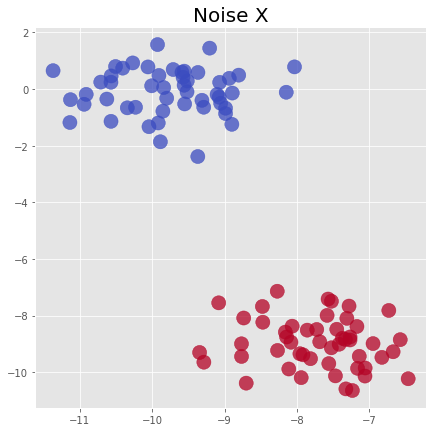

In [24]:
## 노이즈가 없는 100개의 sample 데이터 생성
x, y = make_blobs(n_samples=100, centers=2, random_state=2022, cluster_std=0.8) # 깔끔한 분리를 위해 cluster별 표준편차를 작게 설정

plt.figure(figsize = (7,7))
plt.scatter(x[:, 0], x[:, 1], c=y, s=200, cmap='coolwarm', alpha=.75)
plt.title('Noise X', fontsize = 20)
plt.show()

In [25]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [26]:
## 모델 생성 (C=1)
model_1E2 = SVC(kernel='linear', C=0.01, random_state= 42) 
model_1E2.fit(x, y) 

## 모델 생성 (C=1)
model_10 = SVC(kernel='linear', C=10, random_state= 42) 
model_10.fit(x, y) 

## 모델 계수 확인
print('C=1 :',model_1E2.coef_) 
print('C=10 :',model_10.coef_) 

C=1 : [[ 0.07108765 -0.29066947]]
C=10 : [[ 0.0919447  -0.39913063]]


In [27]:
"""support vector & hyperplace plotting function"""
def svm_graph_decision_function(model, ax=None, plot_support=True):
    """ 
    - model: SVC 모델 객체
    - ax: plot 평면
    - plot_support: support vector 유무
    """
    if ax is None:
        ax = plt.gca()
        
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # margin 안에 들어오는 support vector와 margin에 경계하는 support vector plotting
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.7,
               linestyles=['--', '-', '--'], linewidths=5)

    # Support vector인 경우에 재플랏팅
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    # plt.show()

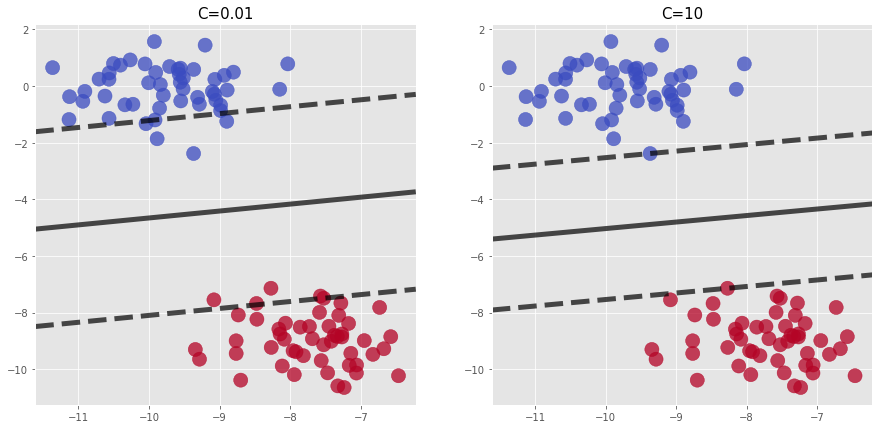

In [28]:
plt.figure(figsize = (15,7))
plt.subplot(1, 2, 1)  
# 입력 변수의 산점도 표현
plt.scatter(x[:, 0], x[:, 1], c=y, s=200, cmap='coolwarm', alpha=.75)
# 차트 실행
svm_graph_decision_function(model_1E2)
plt.title('C=0.01', fontsize=15)

"""C=10인 그래프"""
plt.subplot(1, 2, 2)  
# 입력 변수의 산점도 표현
plt.scatter(x[:, 0], x[:, 1], c=y, s=200, cmap='coolwarm', alpha=.75)
# 차트 실행
svm_graph_decision_function(model_10)
plt.title('C=10', fontsize=15)
plt.show()

-----

#### 1-2. 노이즈가 있는 경우의 SVM

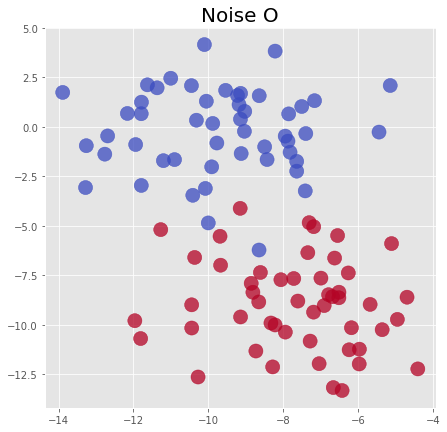

In [29]:
## 노이즈가 있는 100개의 sample 데이터 생성
x, y = make_blobs(n_samples=100, centers=2, random_state=2022, cluster_std=2.1) # 두 클래스가 섞여있도록 하기 위해 cluster 표준편차를 늘림

plt.figure(figsize = (7,7))
plt.scatter(x[:, 0], x[:, 1], c=y, s=200, cmap='coolwarm', alpha=.75)
plt.title('Noise O', fontsize = 20)
plt.show()

In [30]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [31]:
## 모델 생성 (C=1)
model_1E2 = SVC(kernel='linear', C=0.01, random_state= 42) 
model_1E2.fit(x, y) 

## 모델 생성 (C=1)
model_10 = SVC(kernel='linear', C=10, random_state= 42) 
model_10.fit(x, y) 

## 모델 계수 확인
print('C=1 :',model_1E2.coef_) 
print('C=10 :',model_10.coef_) 

C=1 : [[ 0.12011202 -0.33575483]]
C=10 : [[ 0.08098377 -1.0969517 ]]


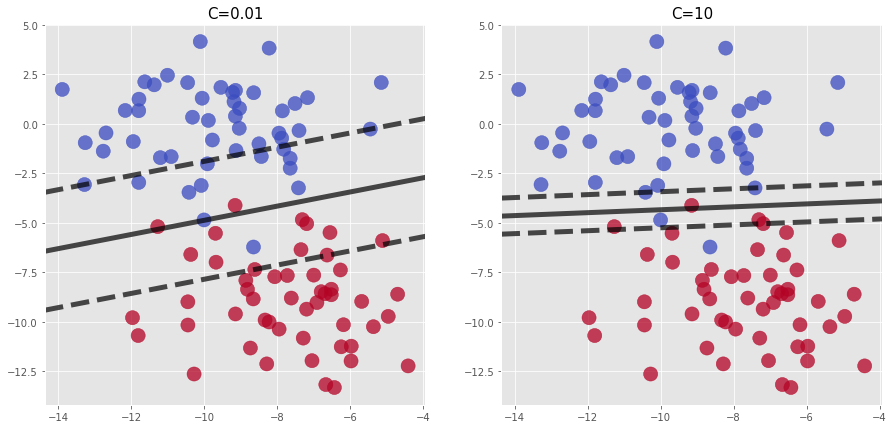

In [32]:
plt.figure(figsize = (15,7))
plt.subplot(1, 2, 1)  
# 입력 변수의 산점도 표현
plt.scatter(x[:, 0], x[:, 1], c=y, s=200, cmap='coolwarm', alpha=.75)
# 차트 실행
svm_graph_decision_function(model_1E2)
plt.title('C=0.01', fontsize=15)

"""C=10인 그래프"""
plt.subplot(1, 2, 2)  
# 입력 변수의 산점도 표현
plt.scatter(x[:, 0], x[:, 1], c=y, s=200, cmap='coolwarm', alpha=.75)
# 차트 실행
svm_graph_decision_function(model_10)
plt.title('C=10', fontsize=15)
plt.show()

----

## 2. Kernel에 따른 차이
- SVM 사용시 kernel을 결정하는 것은 어떠한 기준이 명확하게 존재하지 않기에 어려운 문제이다.
- 사용하는 kernel에 따라 feature space의 특징이 달라지기 때문에 데이터의 특성에 맞는 kernel을 결정하는 것이 중요하다.
- 일반적으로는 RBF kernel, sigmoid kernel, low degree polynomial kernel 등이 주로 사용된다.

#### 2-1. Original space에 선형 분류기 적용

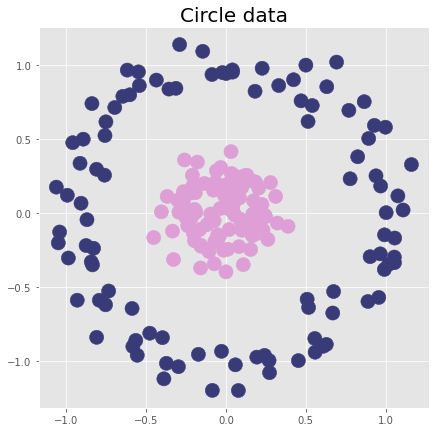

In [33]:
# 중첩된 원 형태의 데이터 500개 생성
X, y = make_circles(200, factor=.2, noise=.1, random_state = 2022) # factor는 내부 원과 외부 원 간의 비율이다.

plt.figure(figsize = (7,7))
plt.scatter(X[:, 0], X[:, 1], c=y, s=200, cmap='tab20b')
plt.title('Circle data', fontsize = 20)
plt.show()

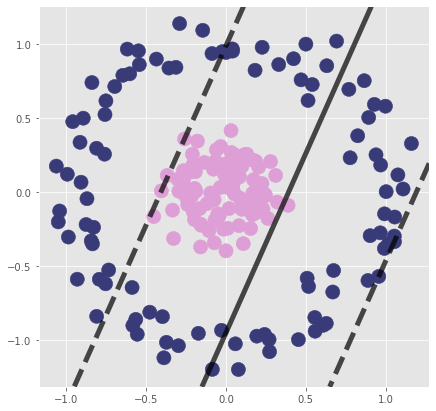

In [34]:
"""Linear 방식으로 분류해보기"""
model_linear = SVC(kernel='linear').fit(X, y) # 모델 생성

# Original space에서는 선형 분류가 불가능하기에 제대로된 초평면을 생성하지 못한다.
plt.figure(figsize = (7,7))
plt.scatter(X[:, 0], X[:, 1], c=y , s= 200, cmap='tab20b') 
svm_graph_decision_function(model=model_linear, plot_support=False)

#### 2-2. Original space에 Radial Basis Function (RBF) kernel을 사용하여 가우시안 형태를 취하도록 변환
- rbf kernel은 차수가 무한대인 다항 커널과 같다.

In [35]:
# 3D 시각화 함수
def plot_3D(x=X, y=y): 
    r = np.exp(-(x ** 2).sum(1)) 
    plt.figure(figsize = (8,7))
    ax = plt.subplot(projection='3d') 
    ax.scatter3D(x[: , 0], x[:, 1], r, c=y, s=100, cmap='tab20b') 
    ax.view_init(elev=30, azim=30) 
    ax.set_xlabel('x') 
    ax.set_ylabel ('y') 
    ax.set_zlabel('r') 
    plt.show() 

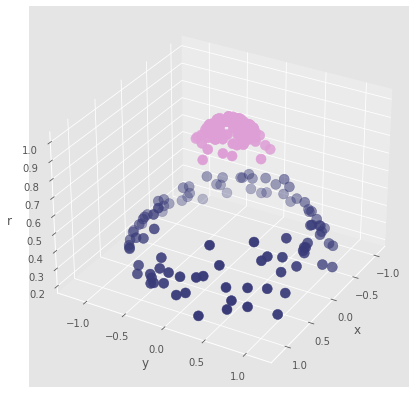

In [36]:
## Original space -> feature space로 변환
plot_3D()

In [37]:
"""kernel을 rbf로 하여 모델 정의"""
model_rbf = SVC(kernel='rbf', C=100, degree=3) # degree=3 : default 
model_rbf.fit(X, y)

SVC(C=100)

In [38]:
"""kernel을 poly로 하여 모델 정의"""
model_poly = SVC(kernel='poly', C=100, degree=3) # degree=3 : default 
model_poly.fit(X, y)

SVC(C=100, kernel='poly')

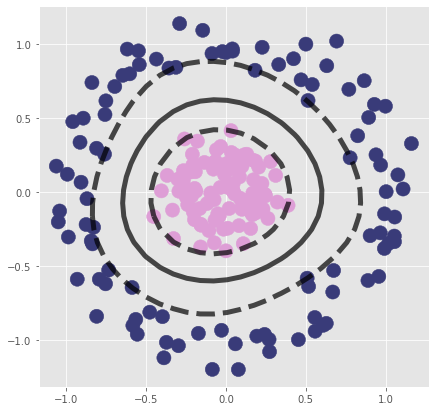

In [39]:
plt.figure(figsize = (7,7))
plt.scatter(X[:, 0], X[:, 1], c=y, s=200, cmap='tab20b') 
plt.scatter(model_rbf.support_vectors_[:, 0], model_rbf.support_vectors_[: , 1], 
            s=300, lw=1, facecolors='None') 
svm_graph_decision_function(model_rbf)

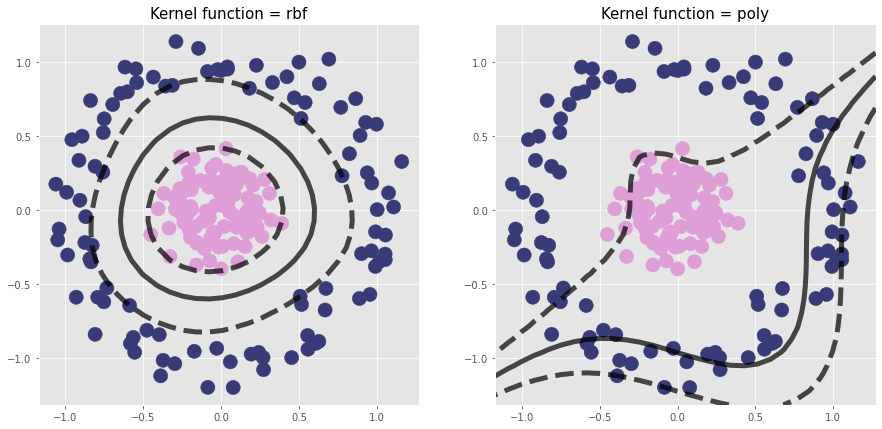

In [40]:
"""데이터셋에 맞는 kernel function을 사용하는 것이 중요하다."""
plt.figure(figsize = (15,7))
plt.subplot(1, 2, 1)  
plt.scatter(X[:, 0], X[:, 1], c=y, s=200, cmap='tab20b') 
plt.scatter(model_rbf.support_vectors_[:, 0], model_rbf.support_vectors_[: , 1], 
            s=300, lw=1, facecolors='None') 
svm_graph_decision_function(model_rbf)
plt.title('Kernel function = rbf', fontsize=15)

"""C=10인 그래프"""
plt.subplot(1, 2, 2)  
## 데이터셋에 맞는 kernel function을 사용하는 것이 중요하다.
plt.scatter(X[:, 0], X[:, 1], c=y, s=200, cmap='tab20b') 
plt.scatter(model_poly.support_vectors_[:, 0], model_poly.support_vectors_[: , 1], 
            s=300, lw=1, facecolors='None') 
svm_graph_decision_function(model_poly)
plt.title('Kernel function = poly', fontsize=15)
plt.show()

---

## 3. gamma 함수에 따른 차이
- gamma 값에 따라서 경계의 굴곡이 어떻게 형성되는지 확인한다.
- `C는 고정하고 gamma만 변경` => 실제에서는 GridSearch CV와 같은 방법으로 C와 gamma를 찾는다.

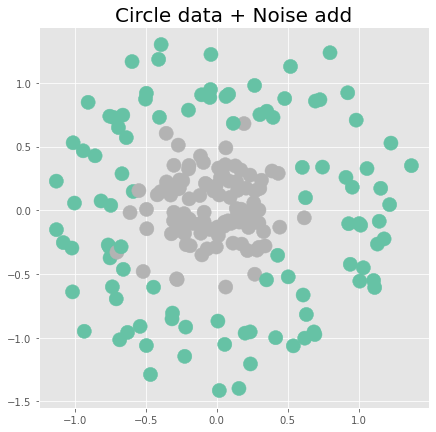

In [41]:
## gamma 함수 차이 확인을 위해 noise를 더 강하게 추가
X, y = make_circles(200, factor=.2, noise=.2, random_state = 2022)

plt.figure(figsize = (7,7))
plt.scatter(X[:, 0], X[:, 1], c=y, s=200, cmap='Set2')
plt.title('Circle data + Noise add', fontsize = 20)
plt.show()

In [42]:
"""kernel을 rbf로 하여 모델 정의 + gamma 설정"""
model_rbf_gamma = SVC(kernel='rbf', C=10) 
model_rbf_gamma.fit(X, y)

SVC(C=10)

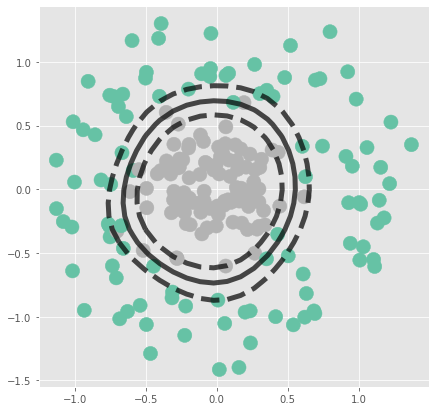

In [43]:
plt.figure(figsize = (7,7))
plt.scatter(X[:, 0], X[:, 1], c=y, s=200, cmap='Set2') 
plt.scatter(model_rbf_gamma.support_vectors_[:, 0], model_rbf_gamma.support_vectors_[: , 1], 
            s=300, lw=1, facecolors='None') 
svm_graph_decision_function(model_rbf_gamma)

[]

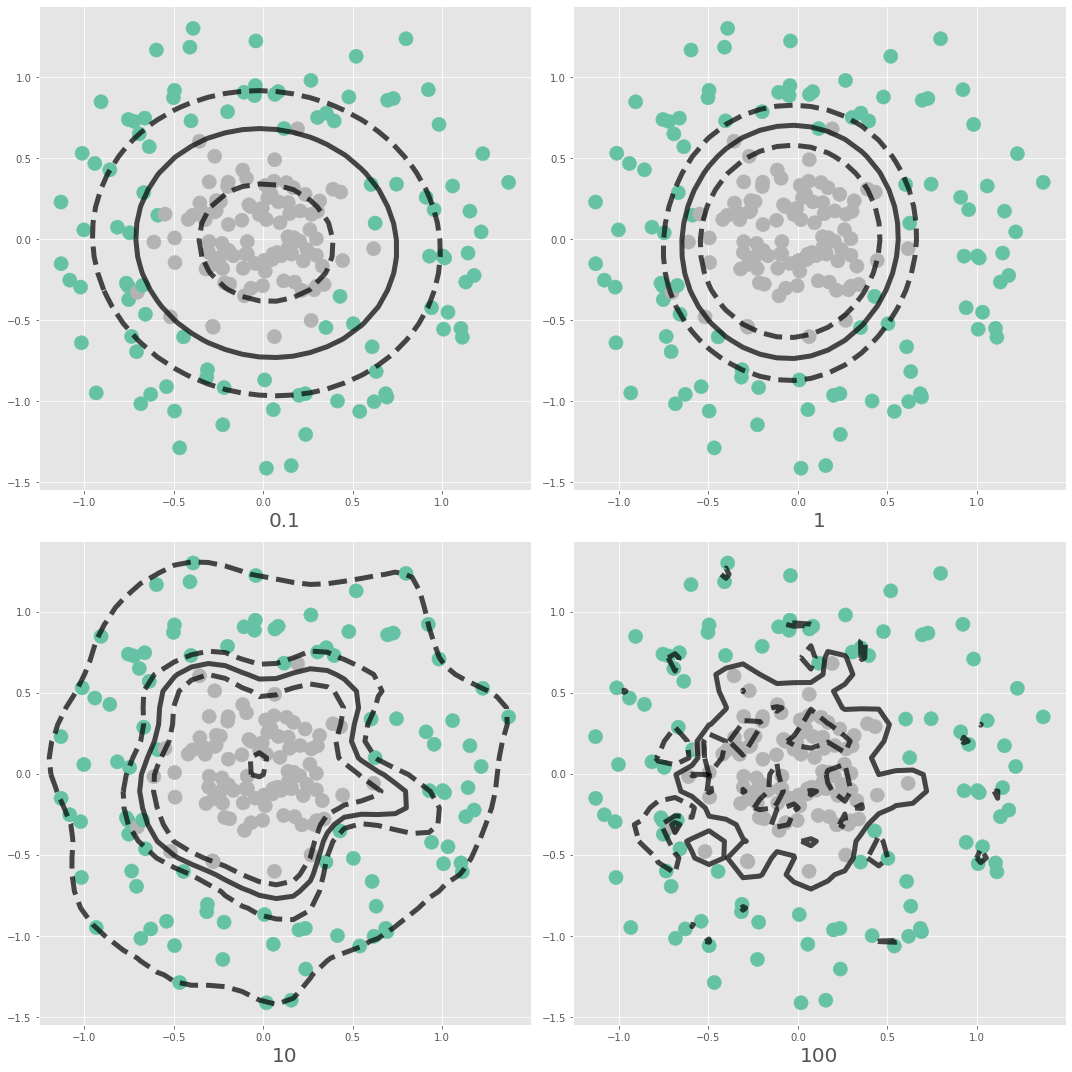

In [44]:
fig, ax = plt.subplots(figsize=(15,15), ncols=2, nrows=2)   # 그래프를 2x2로 배열

axes = ax.ravel()              # 2x2로 생성된 subplot을 1x4로 변환해 
for i, gamma_ in enumerate([0.1, 1, 10, 100]):  
    """kernel을 rbf로 하여 모델 정의 + gamma 설정"""
    model_rbf_gamma = SVC(kernel='rbf', C=10, gamma=gamma_) 
    model_rbf_gamma.fit(X, y)
    axes[i].scatter(X[:, 0], X[:, 1], c=y, s=200, cmap='Set2') 
    axes[i].scatter(model_rbf_gamma.support_vectors_[:, 0], model_rbf_gamma.support_vectors_[: , 1], s=300, lw=1, facecolors='None')   # scatter plot을 그립니다.
    axes[i].set_xlabel(f'{gamma_}', fontsize = 20)
    svm_graph_decision_function(model_rbf_gamma, ax = axes[i])

plt.tight_layout() 
plt.plot()

## 4. SVM scratch-라이브러리를 사용하지 않는 코드
- SVM을 scratch하여 class 형태로 정의한 SVM.py파일을 사용한다.

[ 0.20579975 -0.38697355] 0.04200000000000003


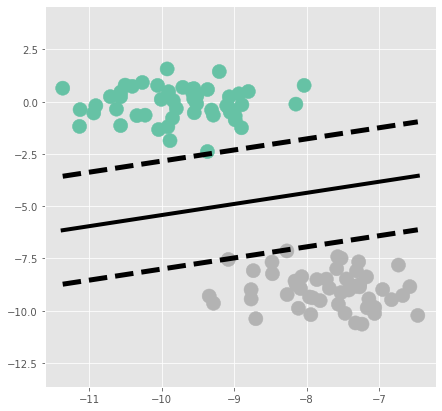

In [45]:
%run SVM.py